<a href="https://colab.research.google.com/github/joluispuma/Analisis_Pro_Banking/blob/joluis/AnalisisProBanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploracion y analisis de datos

In [44]:
import pandas as pd
import numpy as np

# Carga de datos
df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')

#Validacion de encabezados
print("Primeras filas:")
print(df.head())

# tipos de datos y validacion de nulos
print("\nInformación general:")
print(df.info())

print("\nCantidad de nulos en cada columna:")
print(df.isnull().sum())

print("\nCantidad de duplicados:")
print("Duplicados :", df.duplicated().sum())

Primeras filas:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1 

Nulos:
La base de datos no tiene valores nulos en ninguna de sus 18 columnas. Esto es muy conveniente, pues así podremos avanzar sin tener que aplicar métodos de eliminación de nulos.

Duplicados:
La base de datos tiene 0 duplicados, por lo cual no es necesario realizar validacion y control de duplicados.

Estructura:
Hay tanto variables categóricas (Geography, Gender, Card Type) como numéricas (CreditScore, Age, Balance, Point Earned) e indicatorias (Complain, HasCrCard) en el conjunto de datos.

La variable Complain tiene 0 o 1.

La variable Satisfaction Score tiene una escala de 1 a 5.

La variable Exited (nuestro objetivo analitico) también tiene 0 o 1.

*resumen de valores*

In [45]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Edad media: 38 años.
Satisfaction Score: entre 1 y 5, media cerca a 3.
Point Earned: media alrededor de 400.


In [46]:
df.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0,0.0,3.0,DIAMOND,408.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Text(0.5, 1.0, 'Distribución de Edad')

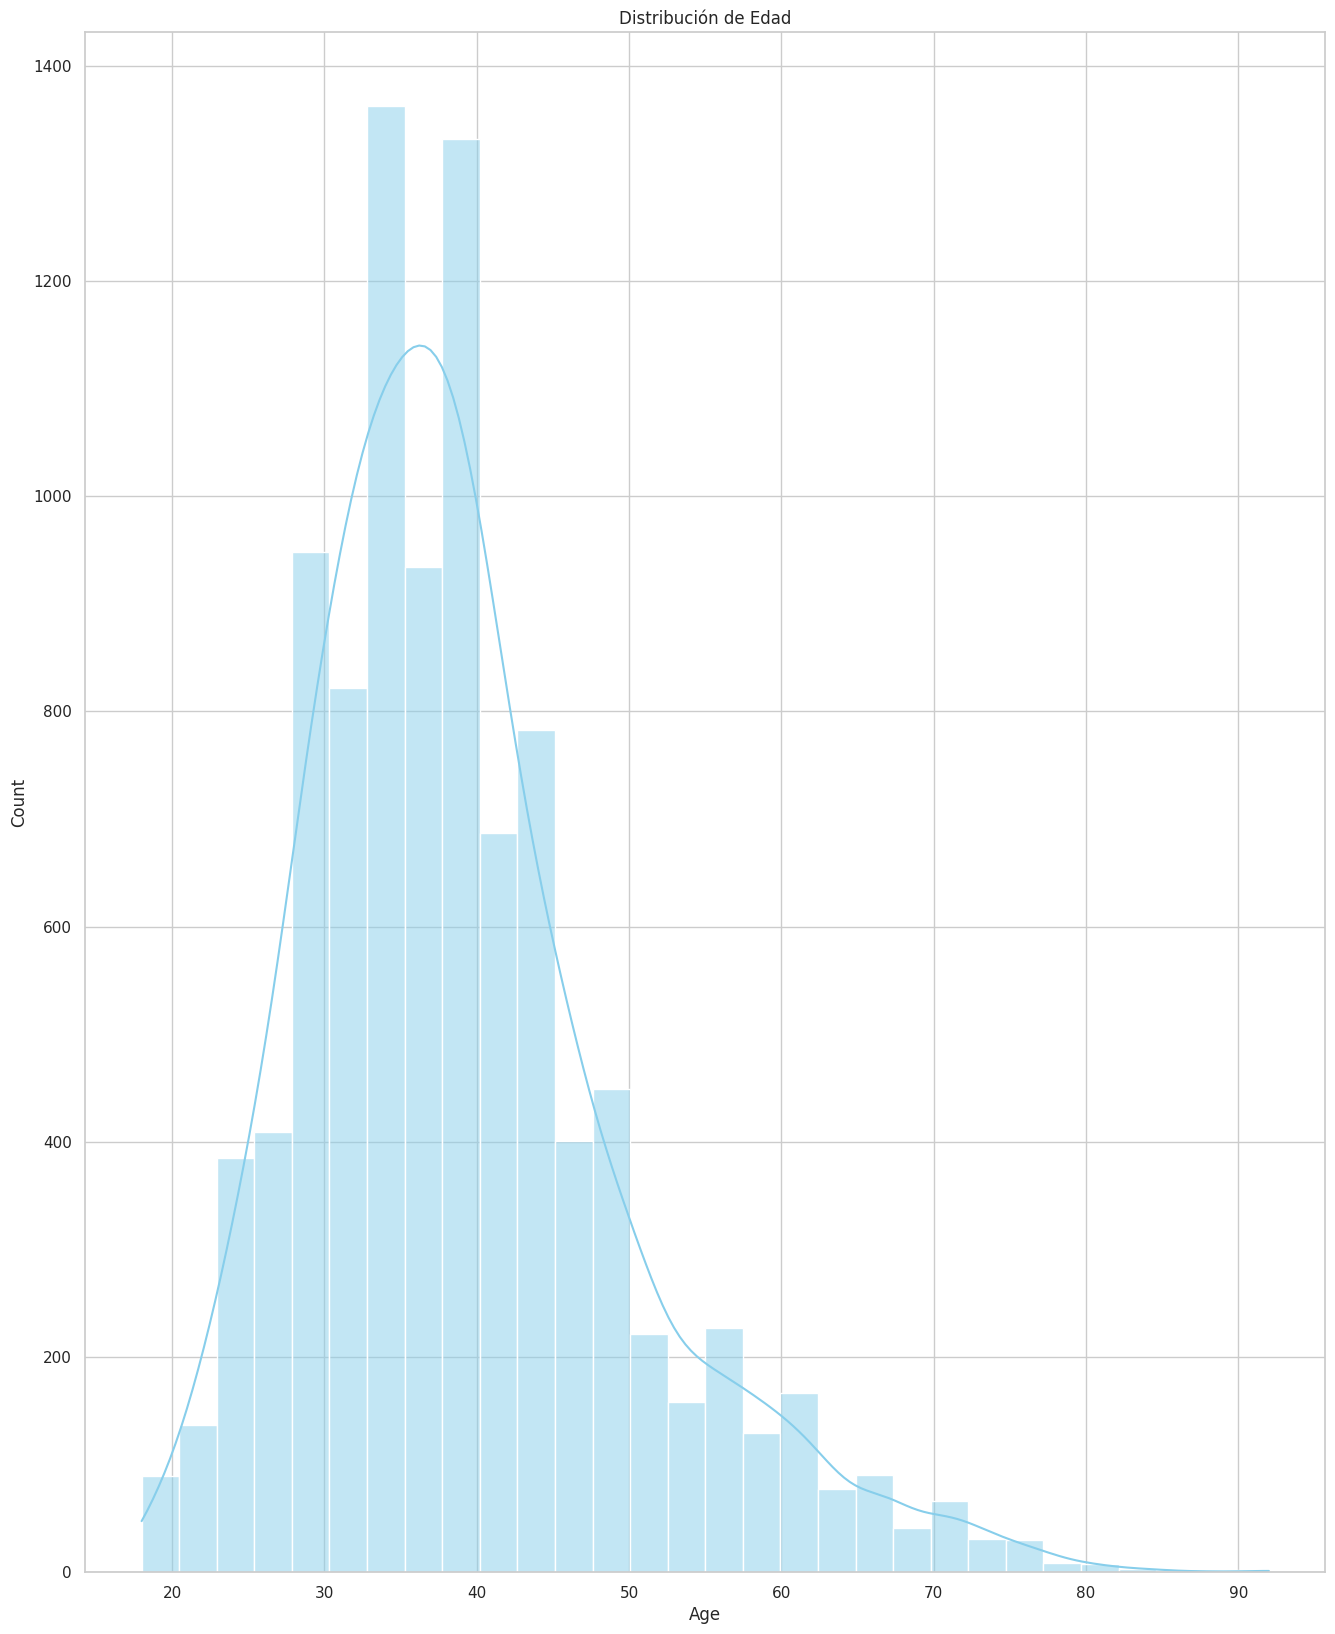

In [71]:
# Importe de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# EXPLORACIÓN INICIAL DE LOS DATOS
# ================================

# Mostrar estructura general del DataFrame (tipos de datos, columnas, etc.)
info_df = df.info()

# Verificar valores nulos por columna
faltantes = df.isnull().sum()

# Verificar cantidad de filas duplicadas
duplicados = df.duplicated().sum()

# Almacenar estadísticas descriptivas básicas (media, min, max, std, etc.)
estadisticas_g = df.describe()

# Calcular la moda de cada columna (valor más frecuente)
moda = df.mode().iloc[0]

# ========================================
# CONFIGURACIÓN GENERAL PARA LOS GRAFICOS
# ========================================

sns.set(style="whitegrid")  # Estilo de fondo
plt.figure(figsize=(16, 20))  # Tamaño general para cada grafico

# =====================================================
# GRAFICO 1: Distribucion de la edad de los clientes
# =====================================================

sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')  # Histograma con línea KDE que es la linea que marca la tendencia.
plt.title('Distribución de Edad') # Título del gráfico



Text(0, 0.5, 'Promedio de Credit Score')

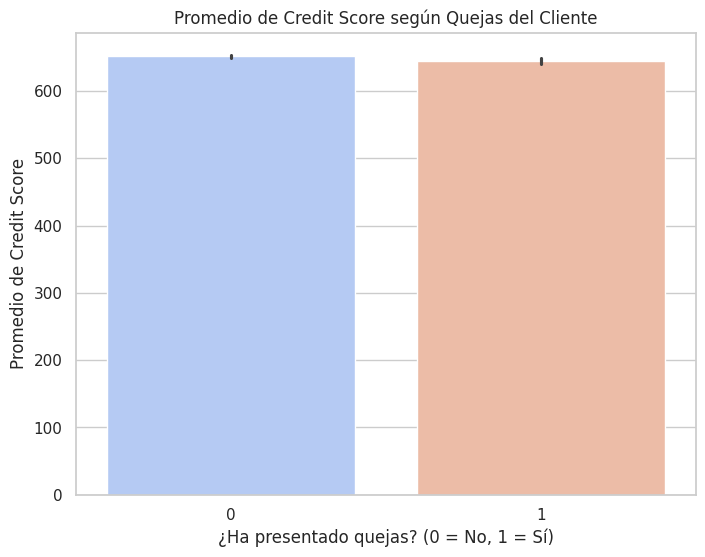

In [72]:
# ====================================================
# GRAFICO 2: grafico de barras quejas vs credit score
# ====================================================

plt.figure(figsize=(8, 6))
# gráfico de barra
sns.barplot(
    x='Complain',  # Variable categórica binaria (0: No se quejó, 1: Se quejó)
    y='CreditScore',  # Variable cuantitativa a promediar
    data=df,
    estimator=np.mean,  # Mostrar el promedio en lugar de la cuenta de totales
    hue='Complain',
    palette='coolwarm',
    legend=False
)
# Título del gráfico
plt.title('Promedio de Credit Score según Quejas del Cliente')
# Subtitulo del eje X
plt.xlabel('¿Ha presentado quejas? (0 = No, 1 = Sí)')
# Subtitulo del eje Y
plt.ylabel('Promedio de Credit Score')




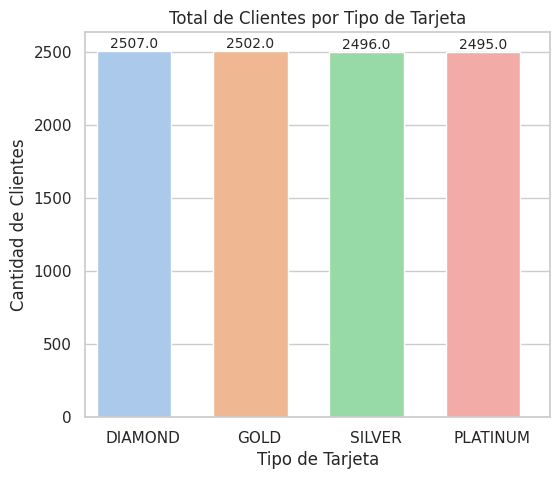

In [62]:
# ==================================================
# GRAFICO 3: Conteo de clientes por tipo de tarjeta
# ==================================================

# gráfico de barras totalizadas
plt.figure(figsize=(6, 5))
ax = sns.countplot(
    x='Card Type',  # Categoría: tipo de tarjeta
    data=df,
    hue='Card Type',
    palette='pastel',
    legend=False
)
# Título del gráfico
plt.title('Total de Clientes por Tipo de Tarjeta')
# Subtitulo del eje X
plt.xlabel('Tipo de Tarjeta')
# Subtitulo del eje Y
plt.ylabel('Cantidad de Clientes')

# Añadir etiquetas numéricas encima de cada barra
# donde b es equivalente a la barra y ax.patches son las barras en la grafica que llamamos ax.
for b in ax.patches:
    height = b.get_height()#Se obtiene la altura de cada barra
    wi = b.get_width()
    b.set_width(wi * 0.8)
    ax.annotate( #Funcion que agrega las etiquetas
        f'{height}',  # Texto que se va a mostrar en cada etiqueta
        (b.get_x() + b.get_width() / 2., height),  # Posición del texto en la grafica calculado con formula para calcular la mitad de la barra.
        ha='center', va='bottom', fontsize=10 #estilo y tamanio del texto.

    )





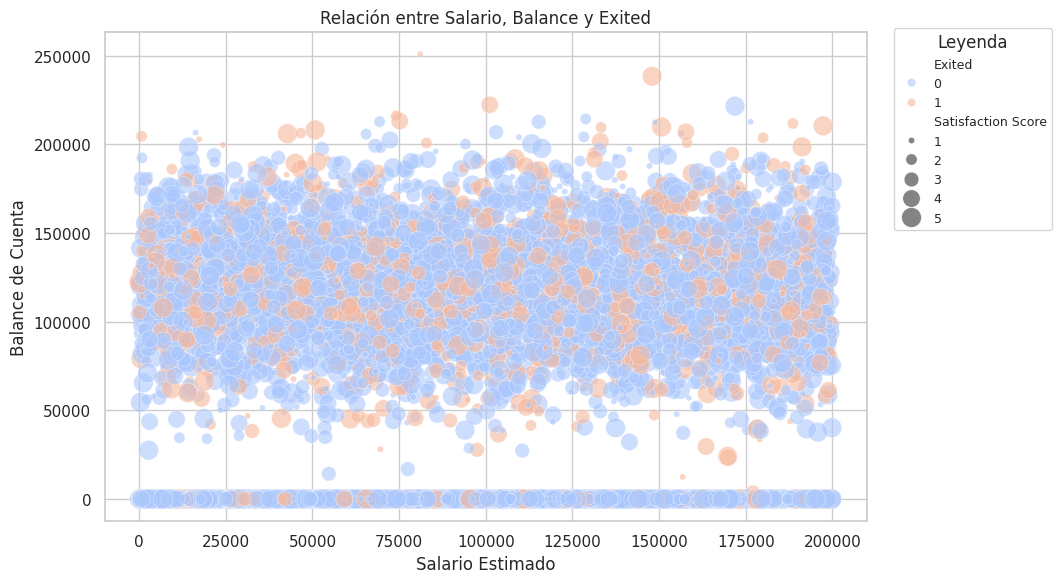

In [70]:
# ================================
# GRAFICO 4: grafico de burbujas de 4 dimensiones
# ================================

# Este gráfico muestra 4 dimensiones:
# - x: EstimatedSalary (ingreso estimado)
# - y: Balance (saldo en cuenta)
# - color de la burbuja: Exited (si el cliente se fue o no)
# - tamaño de la burbuja: Satisfaction Score (nivel de satisfacción)

plt.figure(figsize=(11, 6))
sns.scatterplot(
    data=df,
    x='EstimatedSalary',
    y='Balance',
    hue='Exited',  # Color según si el cliente se fue o no
    size='Satisfaction Score',  # Tamaño según satisfacción
    sizes=(20, 200),  # Escala de tamaños
    alpha=0.6,  # Transparencia para evitar solapamiento
    palette='coolwarm'
)
plt.title('Relación entre Salario, Balance y Exited')
plt.xlabel('Salario Estimado')
plt.ylabel('Balance de Cuenta')
plt.legend(title='Leyenda', loc='best', fontsize=9, bbox_to_anchor=(0.45, 0.5, 0.8, 0.52)) # bbox_to_anchor combina los parámetros de la gráfica completa, (ancho de la grafica, amplía el marco y sube la leyenda, agranda el tamaño de la grafica completa, amplia el tamano hacía arriba del tamaño del cuadro)

# Ajustar distribución final de los gráficos
plt.tight_layout()
plt.show()
